In [14]:
import pandas as pd

In [15]:
df=pd.read_csv("MSFT.csv")

In [16]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-09,279.640015,283.079987,277.609985,282.299988,279.597351,23405200
1,2022-08-10,288.170013,289.809998,286.940002,289.160004,286.391693,24687800
2,2022-08-11,290.850006,291.209991,286.510010,287.019989,284.272156,20065900
3,2022-08-12,288.480011,291.910004,286.940002,291.910004,289.115356,22619700
4,2022-08-15,291.000000,294.179993,290.109985,293.470001,290.660400,18085700
...,...,...,...,...,...,...,...
246,2023-08-02,333.630005,333.630005,326.359985,327.500000,327.500000,27761300
247,2023-08-03,326.000000,329.880005,325.950012,326.660004,326.660004,18253700
248,2023-08-04,331.880005,335.140015,327.239990,327.779999,327.779999,23727700
249,2023-08-07,328.369995,331.109985,327.519989,330.109985,330.109985,17741500


In [17]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2022-08-09,282.299988
1,2022-08-10,289.160004
2,2022-08-11,287.019989
3,2022-08-12,291.910004
4,2022-08-15,293.470001
...,...,...
246,2023-08-02,327.500000
247,2023-08-03,326.660004
248,2023-08-04,327.779999
249,2023-08-07,330.109985


In [18]:
df['Date']

0      2022-08-09
1      2022-08-10
2      2022-08-11
3      2022-08-12
4      2022-08-15
          ...    
246    2023-08-02
247    2023-08-03
248    2023-08-04
249    2023-08-07
250    2023-08-08
Name: Date, Length: 251, dtype: object

In [19]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2022-08-09')
datetime_object

datetime.datetime(2022, 8, 9, 0, 0)

In [20]:
df

,Date,Close
0,2022-08-09,282.299988
1,2022-08-10,289.160004
2,2022-08-11,287.019989
3,2022-08-12,291.910004
4,2022-08-15,293.470001
...,...,...
246,2023-08-02,327.500000
247,2023-08-03,326.660004
248,2023-08-04,327.779999
249,2023-08-07,330.109985


In [21]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\himan\AppData\Local\Temp\ipykernel_21972\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-08-09
1     2022-08-10
2     2022-08-11
3     2022-08-12
4     2022-08-15
         ...    
246   2023-08-02
247   2023-08-03
248   2023-08-04
249   2023-08-07
250   2023-08-08
Name: Date, Length: 251, dtype: datetime64[ns]

In [22]:
df.index = df.pop('Date')
df

,Close
Date,
2022-08-09,282.299988
2022-08-10,289.160004
2022-08-11,287.019989
2022-08-12,291.910004
2022-08-15,293.470001
...,...
2023-08-02,327.500000
2023-08-03,326.660004
2023-08-04,327.779999


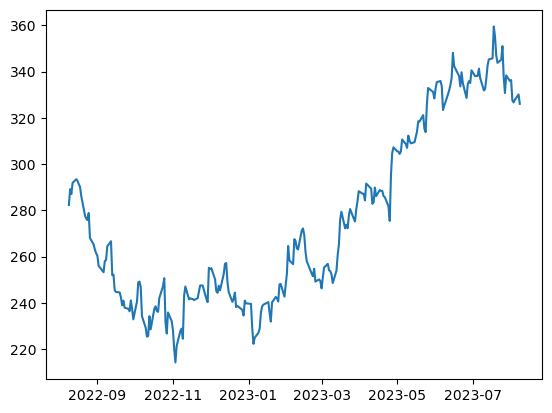

In [23]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [24]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df
# Start day second time around: '2022-08-12'
windowed_df = df_to_windowed_df(df, 
                                '2022-08-12', 
                                '2023-08-08', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-08-12,282.299988,289.160004,287.019989,291.910004
1,2022-08-15,289.160004,287.019989,291.910004,293.470001
2,2022-08-16,287.019989,291.910004,293.470001,292.709991
3,2022-08-17,291.910004,293.470001,292.709991,291.320007
4,2022-08-18,293.470001,292.709991,291.320007,290.170013
...,...,...,...,...,...
243,2023-08-02,338.369995,335.920013,336.339996,327.500000
244,2023-08-03,335.920013,336.339996,327.500000,326.660004
245,2023-08-04,336.339996,327.500000,326.660004,327.779999
246,2023-08-07,327.500000,326.660004,327.779999,330.109985


In [25]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

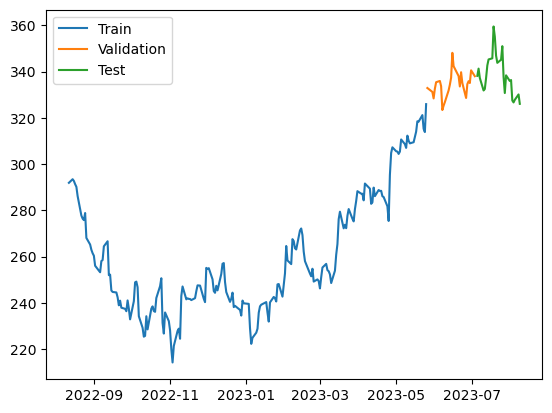

In [26]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 3s 97ms/step - loss: 68234.0625 - mean_absolute_error: 259.9675 - val_loss: 111623.9922 - val_mean_absolute_error: 334.0590
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 67972.6562 - mean_absolute_error: 259.4654 - val_loss: 111326.2031 - val_mean_absolute_error: 333.6130
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 67730.5156 - mean_absolute_error: 258.9978 - val_loss: 111002.2500 - val_mean_absolute_error: 333.1271
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 67452.0547 - mean_absolute_error: 258.4597 - val_loss: 110591.0078 - val_mean_absolute_error: 332.5093
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 67047.4766 - mean_absolute_error: 257.6755 - val_loss: 109946.4531 - val_mean_absolute_error: 331.5387
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 66536.3984 - mean_absolute_error: 256.6823 - val_loss: 109

Epoch 49/100
7/7 [==============================] - 0s 7ms/step - loss: 650.0372 - mean_absolute_error: 21.1870 - val_loss: 5651.2705 - val_mean_absolute_error: 74.9850
Epoch 50/100
7/7 [==============================] - 0s 7ms/step - loss: 643.4460 - mean_absolute_error: 20.5192 - val_loss: 5814.5444 - val_mean_absolute_error: 76.0696
Epoch 51/100
7/7 [==============================] - 0s 7ms/step - loss: 617.1560 - mean_absolute_error: 20.0978 - val_loss: 5623.5332 - val_mean_absolute_error: 74.8042
Epoch 52/100
7/7 [==============================] - 0s 7ms/step - loss: 601.6031 - mean_absolute_error: 19.8442 - val_loss: 5476.0132 - val_mean_absolute_error: 73.8130
Epoch 53/100
7/7 [==============================] - 0s 7ms/step - loss: 593.7879 - mean_absolute_error: 19.9256 - val_loss: 5383.1792 - val_mean_absolute_error: 73.1831
Epoch 54/100
7/7 [==============================] - 0s 7ms/step - loss: 580.2685 - mean_absolute_error: 19.5073 - val_loss: 5135.7368 - val_mean_absolute_e

7/7 [==============================] - 0s 1ms/step


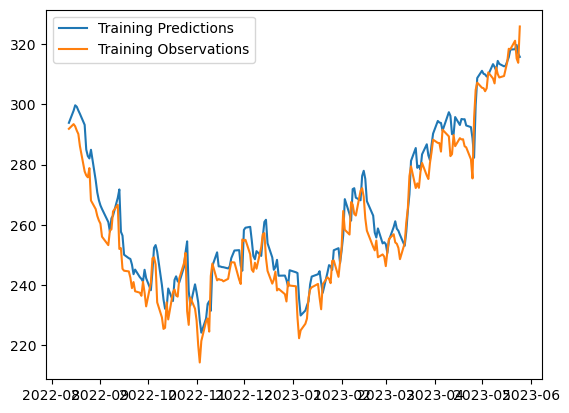

In [29]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 15ms/step


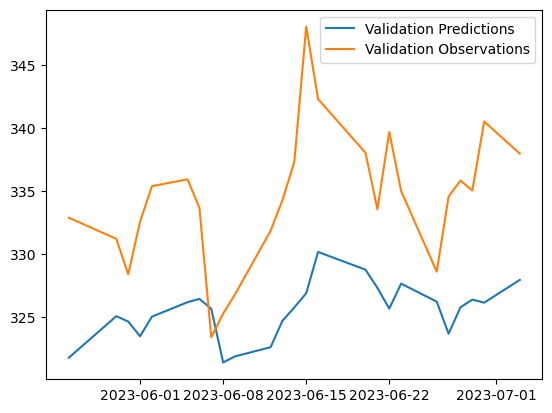

In [30]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 1ms/step


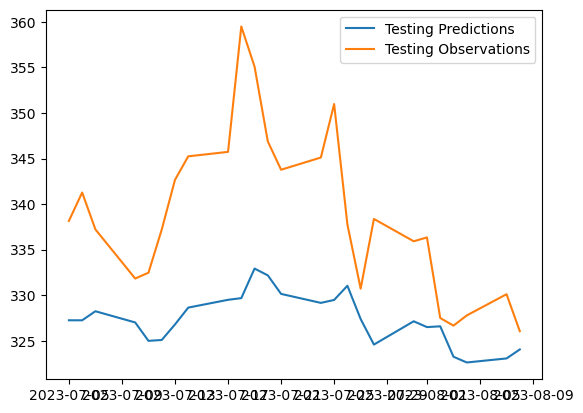

In [31]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

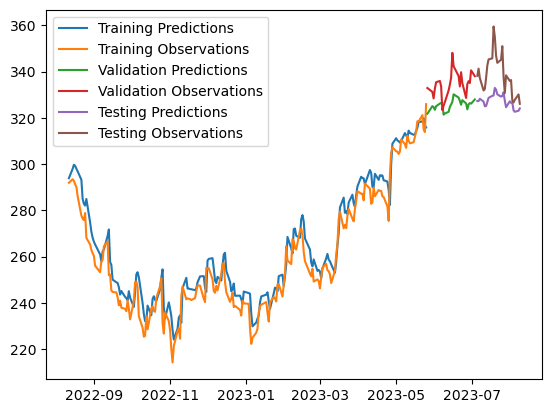

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [33]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 10ms/step


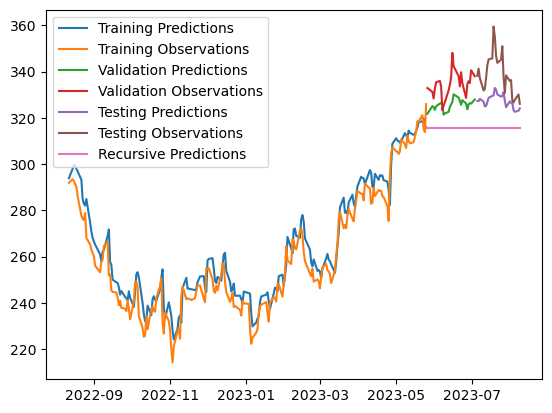

In [34]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])